# Clustering

## What is Clustering?

**Clustering** is a technique of **unsupervised learning** that **groups data points into clusters** based on their similarities. Unlike supervised learning, which uses labeled data, clustering works with **unlabeled data**.

Some key points about clustering are:

1. **Definition**: Clustering finds patterns in data and assigns them to groups based on their features. For example, we can cluster music by genre or decade, or flowers by petal size and shape.
1. **Purpose**: Clustering reveals the hidden structure of data and helps us understand and analyze it better. We can also use clustering to make predictions about new data points based on their cluster membership.
1. **Example**: One common example of clustering is the analysis of the Iris dataset, which contains measurements of four attributes for 150 flowers from three species. Clustering can help us classify the flowers into three groups based on their sepal length and width.
1. **Methods**: There are many clustering algorithms, each with a different way of finding and forming clusters. Some of the popular ones are:
    - **K-means**: This algorithm partitions data into K clusters, where each cluster is represented by its center or centroid. The algorithm iteratively assigns each data point to the closest cluster and updates the centroids until convergence.
    - **Hierarchical clustering**: This algorithm creates a hierarchy of clusters, where each cluster is either a single data point or a combination of smaller clusters. The algorithm can be either agglomerative, which starts with individual data points and merges them into larger clusters, or divisive, which starts with the whole data and splits it into smaller clusters.
    - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm identifies clusters as dense regions of data points that are separated by low-density regions. The algorithm also distinguishes noise or outliers from the clusters.
4.  **Applications**:

    -   **Market segmentation**: Companies use clustering to group
        customers with similar behaviors or preferences.

        -   Example: <https://doi.org/10.1016/j.eswa.2005.11.028>

    -   **Social network analysis**: Clustering helps identify
        communities within networks.

        -   Example: <https://doi.org/10.1007/978-3-030-34770-3_2>

    -   **Search result grouping**: Search engines organize results into
        relevant clusters.

        -   Example: <https://doi.org/10.1007/978-81-322-2752-6_34>

    -   **Medical imaging**: Clustering aids in segmenting medical
        images.

        -   Example: <https://doi.org/10.1016/j.chb.2016.03.056>

    -   **Anomaly detection**: Unusual patterns can be detected by
        identifying outliers.

        -   Example: <https://doi.org/10.1007/978-981-13-1056-0_48>


<font color='Blue'><b>Example:</b></font> The main objective of this example is to demonstrate how to use KMeans clustering to group Iris flowers into three clusters based on their sepal length and width, and how to visualize the original and clustered data using scatter plots.

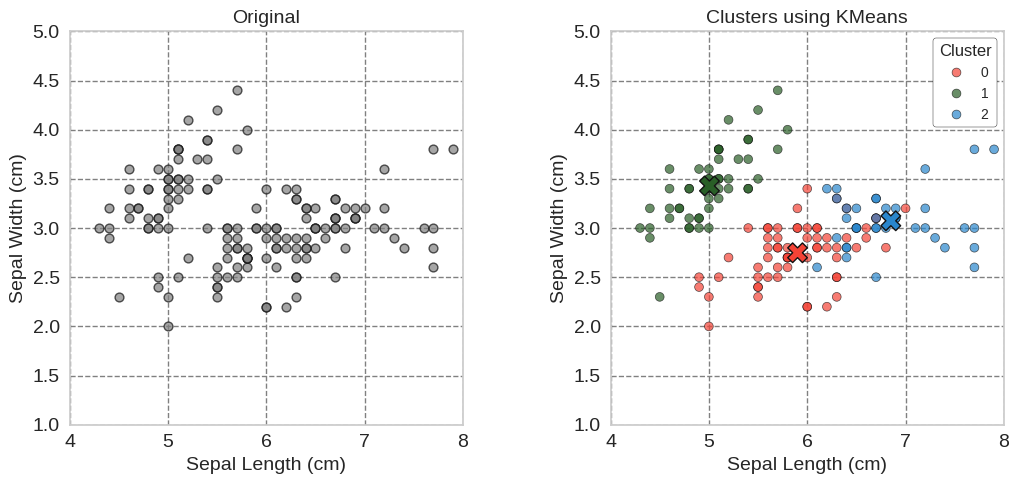

In [19]:
#@title Iris Data Example
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Use a custom style from a specified URL
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENSF444/main/Files/mystyle.mplstyle')

# Define a custom color map
_cmap = ListedColormap(["#f44336", "#295F27", "#2986cc"])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(data)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Scatter plot for the original data
_ =  axs[0].scatter(data[:, 0], data[:, 1], facecolor='gray',
                    edgecolor='k', linewidth=1, alpha=0.7, s=40)

# Scatter plot for clustered data using KMeans
sns.scatterplot(x = data[:, 0], y = data[:, 1], ax = axs[1],
                hue = kmeans.labels_, palette=_cmap,
                edgecolor='k', linewidth=0.5, alpha=0.7, s= 40)
axs[1].legend(loc='best', frameon=True, title = 'Cluster', edgecolor='k', framealpha=1)

# Plot cluster centers as stars
_ = axs[1].scatter(kmeans.cluster_centers_[:, 0],
                   kmeans.cluster_centers_[:, 1],
                   c=np.arange(3),
                   marker='X', cmap=_cmap, edgecolor='k',
                   linewidth=1, alpha=1, s=200)

# Set titles for subplots
axs[0].set_title('Original', fontsize=14)
axs[1].set_title('Clusters using KMeans', fontsize=14)

# Set labels for axes
for ax in axs:
    _ = ax.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)',
               xlim = [4, 8], ylim = [1, 5],
               aspect = 'equal')

# Adjust layout for better presentation
plt.tight_layout()

## Clustering Methods

- **K-means:** A partitioning method that divides data into non-overlapping subsets (clusters) where each data point belongs to only one group.

- **Hierarchical Clustering:** Builds a hierarchy of clusters either through a bottom-up approach (agglomerative) or top-down approach (divisive).

- **DBSCAN:** A density-based clustering method that groups points that are closely packed together, marking as outliers points that lie alone in low-density regions.

- **Gaussian Mixture Models (GMM):** A probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters.

- **Affinity Propagation:** Creates clusters by sending messages between pairs of samples until convergence.

- **Mean Shift:** A sliding-window-based algorithm that assigns the data points to the clusters iteratively by shifting points towards the mode (the highest density of data points).

- **Spectral Clustering:** Uses the eigenvalues of a similarity matrix to reduce dimensionality before clustering in fewer dimensions.

https://scikit-learn.org/stable/modules/clustering.html#clustering

## Clustering Terminology

- **Cluster Label:** The identifier for the cluster to which a data point is assigned.

- **Cluster Prediction:** Applying the `predict()` method to assign cluster labels to new data samples.

- **Label Retrieval:** Accessing the `.labels_` attribute to obtain the cluster labels of the trained model.

## Distance Metrics in Clustering

### Core Concept
Distance metrics are fundamental in clustering algorithms to measure the proximity or similarity between data points.

### Function
These metrics assess the "closeness" of data points, which is pivotal for the formation of clusters.

### Usage
The selection of a distance metric significantly affects the resulting cluster shapes, sizes, and the overall effectiveness of the clustering algorithm.

### Variety
A variety of distance metrics are employed, each suitable for different types of data and clustering requirements:

- **Euclidean Distance (L2):** Calculates the straight-line distance between two points in Euclidean space.
- **Manhattan Distance (L1):** Measures the sum of the absolute differences of their coordinates.
- **Minkowski Distance:** Generalizes Euclidean and Manhattan distances by introducing a parameter $ p $ that allows different metrics to be derived.
- **Hamming Distance:** Counts the number of positions at which the corresponding symbols are different, typically used for categorical data.
- **Cosine Similarity:** Evaluates the cosine of the angle between two vectors, effectively measuring their orientation, not magnitude.

Each metric is chosen based on the data characteristics and the clustering algorithm's specific needs.

### Distance Functions
Here's a table summarizing the distance functions for each metric:

<center>

| Distance metric | Arguments |                      Distance Function                     |
|:---------------:|:---------:|:----------------------------------------------------------:|
|  Euclidean (L2) |    N/A    |              $\sqrt{\sum_{}^{}{(x - y)}^{2}}$              |
|  Manhattan (L1) |    N/A    |                    $\sum_{}^{}\|x - y\|$                   |
|    Chebyshev    |    N/A    |                      $\max_{i}(|x_{i} - y_{i}|)$                     |
|    Minkowski    |    p, w   | $\left( \sum_{}^{}{w*\|x - y\|^{p}} \right)^{\frac{1}{p}}$ |
|      Cosine     |    N/A    |                $\frac{x.y}{\sqrt{\sum x^{2}}*\sqrt{\sum y^{2}}}$               |

</center>

For more detailed information and examples, you can refer to the [scikit-learn documentation on distance metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html).

## K-means Clustering

**What is K-means?**
K-means is a method to divide a set of data points into **'k'** distinct clusters, where 'k' is a predefined number. The goal is to partition the data such that points in the same cluster are similar to each other, while points in different clusters are not.

**How does it work?**
1. **Initialization**: Randomly select **'k'** points from the data as the initial cluster centers (centroids).
2. **Assignment**: Assign each data point to the nearest centroid, forming **'k'** clusters.
3. **Update**: Calculate the new centroid of each cluster by taking the mean of all points assigned to that cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change significantly.

**The Math Behind K-means**

The algorithm minimizes the within-cluster variance, which is the sum of squared distances between each point and its corresponding centroid. This is known as the **inertia** or **within-cluster sum of squares (WCSS)** and is given by the formula:

$$ \text{Inertia  or WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2 $$

where:
- $k$ is the number of clusters,
- $C_i$ is the set of points in cluster $i$,
- $x$ is a data point in cluster $C_i$,
- $\mu_i$ is the centroid of cluster $C_i$,
- $\|x - \mu_i\|$ is the Euclidean distance between point $x$ and centroid $\mu_i$.

The algorithm iterates through the assignment and update steps to minimize the WCSS, which effectively makes the clusters as compact and separated as possible.

### Brief explanation of each hyperparameter for KMeans in scikit-learn:

- **n_clusters**: The number of clusters and centroids to form. It's the 'k' in k-means.
- **init**: Method for initialization of centroids. Options include 'k-means++' for faster convergence, 'random' for random initialization, or a custom method.
- **n_init**: Number of times the algorithm will run with different centroid seeds. The best output in terms of inertia is chosen.
- **max_iter**: Maximum number of iterations for a single run of the algorithm.
- **tol**: Tolerance for declaring convergence based on the Frobenius norm of the difference in cluster centers.
- **verbose**: Verbosity mode for logging the process of the algorithm.
- **random_state**: Seed for random number generation, ensuring reproducibility.
- **copy_x**: Whether to copy the input data; affects numerical stability.
- **algorithm**: Choice of algorithm to use; 'lloyd' for the standard approach, 'elkan' for a more efficient but memory-intensive method.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

<font color='Blue'><b>Example:</b></font>

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic two-dimensional data
X, y = make_blobs(random_state = 2)

df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
display(df)

# Create subplots for original data and clustered data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(df['Feature 1'], df['Feature 2'],
           c='gray', edgecolor='k', linewidth=1, alpha=0.7, s=40, zorder = 2)
ax.set(xlabel='Feature 1', ylabel='Feature 2',
        xlim = [-6, 8], ylim = [-12, 2], aspect = 'equal')
ax.grid(True)
# Adjust layout for better presentation
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

k = 3
# Build the KMeans clustering model
kmeans = KMeans(n_clusters = k, random_state=0, n_init='auto')
kmeans.fit(X)

# Output coordinates of cluster centers
print(f"Cluster Centers:\n{kmeans.cluster_centers_.round(3)}")

# Output cluster memberships
print(f"\nCluster Memberships:\n{kmeans.labels_}")

# Output sum of squared distances of samples to their closest cluster center
print(f"\nInertia (or WCSS):\n{kmeans.inertia_:.4f}")

# Output number of iterations run
print(f"\nNumber of Iterations Run:\n{kmeans.n_iter_}")

# Define a custom color map for the clusters
colors = ["#f44336", "#4e9130", "#2986cc"]
cmap = ListedColormap(colors)

# Create subplots for original data and clustered data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for the original data
axs[0].scatter(df['Feature 1'], df['Feature 2'], c='gray', edgecolor='k',
               linewidth=1, alpha=0.7, s=40)
axs[0].set_title('Original Data', fontsize=14)

# Scatter plot for the clustered data
sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = axs[1],
                hue = kmeans.labels_, palette=colors,
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
axs[1].legend(loc='best', frameon=True, title = 'Cluster', edgecolor='k', framealpha=1)

axs[1].set_title(f'Clusters using KMeans (k = {k})', fontsize=14)

# Plot the cluster centers
centers = axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               c=range(k), marker='*', cmap=cmap, edgecolor='k',
               linewidth=1, alpha=1, s=200)

_ = axs[1].text(0.63, 0.03, f'Inertia = {kmeans.inertia_:.4f}',
               transform=axs[1].transAxes, fontsize=12, weight='bold',
               bbox=dict(facecolor='Whitesmoke', alpha=0.7))

# Decision boundary display
DecisionBoundaryDisplay.from_estimator(kmeans, X, cmap=cmap,
                                        ax=axs[1], response_method="predict",
                                        plot_method="pcolormesh",
                                        xlabel='Feature 1',
                                        ylabel='Feature 2',
                                        shading="auto",
                                        grid_resolution=300,
                                        alpha=0.2, eps = 5)

# Set labels for axes
for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2',
            xlim = [-6, 8], ylim = [-12, 2], aspect = 'equal')
    ax.grid(True)

# Adjust layout for better presentation
plt.tight_layout()

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate cluster counts using Counter
counts = Counter(kmeans.labels_)

# Plotting an aesthetically pleasing pie chart for cluster size distribution
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Creating a pie chart with specified colors, shadows, and text properties
ax.pie(counts.values(), labels= [f'Cluster {i}' for i in counts.keys()],
      #  autopct='%1.1f%%',
       colors=colors, shadow=True,
       wedgeprops= dict(edgecolor = 'k', linewidth = 1),
       textprops= dict(fontsize = 12, color = 'k', weight = 'bold'),
       autopct=lambda p: f'{p:.1f}%\n({p*sum(counts.values())/100:.0f} Instances)',
       )

# Adding a title to the plot with bold font weight
ax.set_title('Distribution of Cluster Sizes', weight='bold')

# Ensuring a tight layout for better visualization
plt.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Copying the dataframe and adding a new column for cluster labels
df_labels = df.assign(Clusters=kmeans.labels_.astype(str))

# Creating subplots for boxplots of Feature 1 and Feature 2 with cluster labels
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# Plotting boxplots for Feature 1 and Feature 2
for i, feature in enumerate(["Feature 1", "Feature 2"]):
    sns.boxplot(ax=ax[i], data=df_labels, x=feature, y="Clusters",
                medianprops={"color": "k", "linewidth": 2},
                color="white", linecolor="#5b5b5b", linewidth=1.5)

    # Adding vertical dashed lines at cluster centers for both features
    for j in range(3):
        ax[i].axvline(x=kmeans.cluster_centers_[j, i], color=colors[j], lw=3, ls='--', label=f'Cluster {j}')

    # Removing the legends from the subplots
    ax[i].legend().remove()

# Creating a single legend for both subplots and placing it on the right side of the figure
# Using the handles and labels from the first subplot
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', title='Clusters Centers', bbox_to_anchor=(1.13, 0.55))

# Ensuring a tight layout for better visualization
plt.tight_layout()


## Validation Metrics for Clustering

- **Silhouette Coefficient:** Measures how similar an object is to its own cluster compared to other clusters. A higher silhouette value indicates better-defined clusters.

- **Calinski-Harabasz Index:** Also known as the Variance Ratio Criterion, this metric evaluates the cluster validity based on the ratio between the within-cluster dispersion and the between-cluster dispersion.

- **Davies-Bouldin Index:** This index signifies the average 'similarity' between clusters, where lower values indicate better clustering.

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


## Silhouette Coefficient

- **a:** Mean distance between a sample and all other points in the same cluster.
- **b:** Mean distance between a sample and all other points in the next nearest cluster.
- **Formula:** The coefficient for a sample is computed as $$\frac{b - a}{\max(a, b)}$$.
- **Score:** The silhouette score of a dataset is the mean of the silhouette coefficient for each sample, calculated using `sklearn.metrics.silhouette_score(X, labels)`.

This metric is useful for assessing the appropriateness of the clustering by measuring how well each object lies within its cluster.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score

<font color='Blue'><b>Example:</b></font> Suppose we have the following dataset with two clusters

-   $X  = \lbrack(1,\ 2),\ (2,\ 3),\ (3,\ 4),\ (7,\ 8),\ (8,\ 9),\ (9,\ 10)\rbrack$

-   $labels\  = \ \lbrack 0,\ 0,\ 0,\ 1,\ 1,\ 1\rbrack$


- For the first point (1, 2):

  - The distance between (1, 2) and (2, 3) is $$\sqrt{(1 - 2)^2 + (2 - 3)^2} = \sqrt{(-1)^2 + (-1)^2} = \sqrt{2} = 1.41.$$

    The distance between (1, 2) and (3, 4) is $$\sqrt{(1 - 3)^2 + (2 - 4)^2} = \sqrt{(-2)^2 + (-2)^2} = \sqrt{8} = 2.83.$$

    The mean distance to the points in the same cluster is **a = (1.41 + 2.83) / 2 = 2.12**.
  
  - The distance between (1, 2) and (7, 8) is $$\sqrt{(1 - 7)^2 + (2 - 8)^2} = \sqrt{(-6)^2 + (-6)^2} = \sqrt{72} = 8.49.$$

    The distance between (1, 2) and (8, 9) is $$\sqrt{(1 - 8)^2 + (2 - 9)^2} = \sqrt{(-7)^2 + (-7)^2} = \sqrt{98} = 9.90.$$

    The distance between (1, 2) and (9, 10) is $$\sqrt{(1 - 9)^2 + (2 - 10)^2} = \sqrt{(-8)^2 + (-8)^2} = \sqrt{128} = 11.31.$$

    The mean distance to the points in the next cluster is **b = (8.49 + 9.90 + 11.31) / 3 = 9.90**.

  - The silhouette coefficient is
    $$\frac{b - a}{\max(a, b)} = (9.90 - 2.12) / 9.90 = 0.79.$$

- For the second point (2, 3):

  - The distance between (2, 3) and (1, 2) is 1.41 as before.

    The distance between (2, 3) and (3, 4) is also 1.41, since they are one unit apart.

    The mean distance to the points in the same cluster is **a = (1.41 + 1.41) / 2 = 1.41**.

  - The distance between (2, 3) and (7, 8) is $$\sqrt{(2 - 7)^2 + (3 - 8)^2} = \sqrt{(-5)^2 + (-5)^2} = \sqrt{50} = 7.07.$$

    The distance between (2, 3) and (8, 9) is $$\sqrt{(2 - 8)^2 + (3 - 9)^2} = \sqrt{(-6)^2 + (-6)^2} = \sqrt{72} = 8.49.$$

    The distance between (2, 3) and (9, 10) is $$\sqrt{(2 - 9)^2 + (3 - 10)^2} = \sqrt{(-7)^2 + (-7)^2} = \sqrt{98} = 9.90.$$

    The mean distance to the points in the next cluster is **b = (7.07 + 8.49 + 9.90) / 3 = 8.49**.

  - The silhouette coefficient is
    $$\frac{b - a}{\max(a, b)} = (8.49 - 1.41) / 8.49 = 0.83.$$

- For the third point (3, 4):

  - The distance between (3, 4) and (1, 2) is $$\sqrt{(3 - 1)^2 + (4 - 2)^2} = \sqrt{(2)^2 + (2)^2} = \sqrt{8} = 2.83.$$

    The distance between (3, 4) and (2, 3) is 1.41 as before.

    The mean distance to the points in the same cluster is **a = (2.83 + 1.41) / 2 = 2.12**.

  - The distance between (3, 4) and (7, 8) is $$\sqrt{(3 - 7)^2 + (4 - 8)^2} = \sqrt{(-4)^2 + (-4)^2} = \sqrt{32} = 5.66.$$

    The distance between (3, 4) and (8, 9) is $$\sqrt{(3 - 8)^2 + (4 - 9)^2} = \sqrt{(-5)^2 + (-5)^2} = \sqrt{50} = 7.07.$$

    The distance between (3, 4) and (9, 10) is $$\sqrt{(3 - 9)^2 + (4 - 10)^2} = \sqrt{(-6)^2 + (-6)^2} = \sqrt{72} = 8.49.$$

    The mean distance to the points in the next cluster is **b = (5.66 + 7.07 + 8.49) / 3 = 7.07**.

  - The silhouette coefficient is
    $$\frac{b - a}{\max(a, b)} = (7.07 - 2.12) / 7.07 = 0.70.$$

- For the fourth point (7, 8):

  - The distance between (7, 8) and (8, 9) is $$\sqrt{(7 - 8)^2 + (8 - 9)^2} = \sqrt{(-1)^2 + (-1)^2} = \sqrt{2} = 1.41.$$

    The distance between (7, 8) and (9, 10) is $$\sqrt{(7 - 9)^2 + (8 - 10)^2} = \sqrt{(-2)^2 + (-2)^2} = \sqrt{8} = 2.83.$$

    The mean distance to the points in the same cluster is **a = (1.41 + 2.83) / 2 = 2.12**.
  
  - The distance between (7, 8) and (1, 2) is $$\sqrt{(7 - 1)^2 + (8 - 2)^2} = \sqrt{(6)^2 + (6)^2} = \sqrt{72} = 8.49.$$

    The distance between (7, 8) and (2, 3) is $$\sqrt{(7 - 2)^2 + (8 - 3)^2} = \sqrt{(5)^2 + (5)^2} = \sqrt{50} = 7.07.$$

    The distance between (7, 8) and (3, 4) is $$\sqrt{(7 - 3)^2 + (8 - 4)^2} = \sqrt{(4)^2 + (4)^2} = \sqrt{32} = 5.66.$$

    The mean distance to the points in the next cluster is **b = (8.49 + 7.07 + 5.66) / 3 = 7.07**.

  - The silhouette coefficient is
    $$\frac{b - a}{\max(a, b)} = (7.07 - 2.12) / 7.07 = 0.70.$$

- For the fifth point (8, 9):

  - The distance between (8, 9) and (7, 8) is 1.41 as before.

    The distance between (8, 9) and (9, 10) is also 1.41, since they are one unit apart.

    The mean distance to the points in the same cluster is **a = (1.41 + 1.41) / 2 = 1.41**.

  - The distance between (8, 9) and (1, 2) is $$\sqrt{(8 - 1)^2 + (9 - 2)^2} = \sqrt{(7)^2 + (7)^2} = \sqrt{98} = 9.90.$$

    The distance between (8, 9) and (2, 3) is $$\sqrt{(8 - 2)^2 + (9 - 3)^2} = \sqrt{(6)^2 + (6)^2} = \sqrt{72} = 8.49.$$

    The distance between (8, 9) and (3, 4) is $$\sqrt{(8 - 3)^2 + (9 - 4)^2} = \sqrt{(5)^2 + (5)^2} = \sqrt{50} = 7.07.$$

    The mean distance to the points in the next cluster is **b = (9.90 + 8.49 + 7.07) / 3 = 8.49**.

  - The silhouette coefficient is
    $$\frac{b - a}{\max(a, b)} = (8.49 - 1.41) / 8.49 = 0.83.$$

- For the sixth point (9, 10):

  - The distance between (9, 10) and (7, 8) is 2.83 as before.

    The distance between (9, 10) and (8, 9) is 1.41 as before.

    The mean distance to the points in the same cluster is **a = (2.83 + 1.41) / 2 = 2.12**.

  - The distance between (9, 10) and (1, 2) is $$\sqrt{(9 - 1)^2 + (10 - 2)^2} = \sqrt{(8)^2 + (8)^2} = \sqrt{128} = 11.31.$$

    The distance between (9, 10) and (2, 3) is $$\sqrt{(9 - 2)^2 + (10 - 3)^2} = \sqrt{(7)^2 + (7)^2} = \sqrt{98} = 9.90.$$

    The distance between (9, 10) and (3, 4) is $$\sqrt{(9 - 3)^2 + (10 - 4)^2} = \sqrt{(6)^2 + (6)^2} = \sqrt{72} = 8.49.$$

    The mean distance to the points in the next cluster is **b = (11.31 + 9.90 + 8.49) / 3 = 9.90**.

  - The silhouette coefficient is
    $$\frac{b - a}{\max(a, b)} = (9.90 - 2.12) / 9.90 = 0.79.$$

The coefficients for each point are (0.79, 0.83, 0.79, 0.70, 0.83, 0.79). The silhouette score as the mean of the coefficients is 0.79. Note that there are some rounding errors here and the final number is different from the calculations through Python code.

In [ ]:
# Suppose we have the following dataset with two clusters
X_exp = [[1, 2], [2, 3], [3, 4], [7, 8], [8, 9], [9, 10]]
labels = [0, 0, 0, 1, 1, 1]

# Define a function to calculate the Euclidean distance between two points
def distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

# Define a function to calculate the mean distance between a point and a list of points
def mean_distance(p, points):
    total = 0
    for q in points:
        total += distance(p, q)
    return total / len(points)

# Define a function to calculate the silhouette coefficient for a point
def silhouette_coefficient(p, label, X, labels):
    # Find the points in the same cluster as p
    same_cluster = [q for q, l in zip(X, labels) if l == label and q != p]
    # Find the points in the next nearest cluster as p
    next_cluster = [q for q, l in zip(X, labels) if l != label]
    # Calculate the mean distance to the same cluster (a)
    a = mean_distance(p, same_cluster)
    # Calculate the mean distance to the next cluster (b)
    b = mean_distance(p, next_cluster)
    # Return the silhouette coefficient
    return (b - a) / max(a, b)

# Calculate the silhouette coefficient for each sample
coefficients = [silhouette_coefficient(p, l, X_exp, labels) for p, l in zip(X_exp, labels)]

# Print the coefficients
print(coefficients)

# Calculate the silhouette score as the mean of the coefficients
score = sum(coefficients) / len(coefficients)

# Print the score
print(f'silhouette score: {score:.4f}')

We could also get similar results using `silhouette_score`.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient for the clustering result
silhouette_coefficient = silhouette_score(X_exp, labels)

# Output the Silhouette Coefficient
print(f"Silhouette Coefficient for the clustering result: {silhouette_coefficient:.4f}")

***

### Advantages of the Silhouette Coefficient

- **Defined Range**: The Silhouette Coefficient scores range from -1 to +1. A score of -1 denotes poor clustering, whereas +1 indicates highly compact clusters.
- **Indication of Overlap**: Scores near 0 indicate overlapping clusters, which means that data points might not be clearly categorized.
- **Measure of Separation and Density**: A higher score reflects that clusters are well-separated and densely packed, which is consistent with the standard definition of a cluster.

The Silhouette Coefficient quantitatively gauges the quality of clustering outcomes, capturing the essence of what constitutes effective clustering.

### Drawbacks of the Silhouette Coefficient

- **Preference for Convexity**: The Silhouette Coefficient inherently assumes that clusters are spherical or ellipsoidal in shape, which aligns with the concept of convex clusters. This assumption can lead to a bias in the scoring system, where it may favor clusters that fit this geometric shape over others. For instance, in scenarios where the natural grouping of data is non-convex, such as crescent or irregularly shaped clusters, the Silhouette Coefficient might not accurately reflect the true clustering structure. This is especially evident in comparison to density-based clustering algorithms like DBSCAN, which are designed to detect and handle arbitrarily shaped clusters. DBSCAN, for example, defines clusters based on high-density areas separated by low-density areas, without any assumption of their shape.

As a result, when using the Silhouette Coefficient as a measure of clustering quality, one must be cautious if the data is expected to contain non-convex clusters. In such cases, the metric might misleadingly suggest suboptimal clustering due to its geometric bias, despite the clusters being meaningful according to the data's distribution and the clustering algorithm's criteria.

<!-- ### Drawbacks of the Silhouette Coefficient

- **Preference for Convexity**: The metric tends to assign higher scores to convex clusters compared to other types, such as those identified by density-based clustering algorithms like DBSCAN.

While the Silhouette Coefficient is a valuable tool, it may not fully recognize the complexity of clusters that deviate from convex shapes. -->

### A Brief explanation of each hyperparameter for `silhouette_score`:

- **X**: This is either the array of pairwise distances between samples or a feature array from which distances can be computed.

- **Labels**: These are the predicted labels for each sample, indicating which cluster each sample belongs to.

- **Metric**: Specifies the metric used to calculate distance between instances in a feature array. If `X` is a distance array, use `metric="precomputed"`.
- **Sample_size**: Determines the size of the sample used when computing the Silhouette Coefficient. If `None`, no sampling is used.

- **Random_state**: Sets the seed for random number generation when selecting a subset of samples, ensuring reproducibility across multiple function calls.

- ****kwargs**: Any additional parameters are passed directly to the distance function, which can vary depending on the metric used.

The function computes the mean Silhouette Coefficient, which ranges from -1 (incorrect clustering) to +1 (highly dense clustering), with values near 0 indicating overlapping clusters.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

<font color='Blue'><b>Example:</b></font>

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient for the clustering result
silhouette_coefficient = silhouette_score(X, kmeans.labels_)

# Output the Silhouette Coefficient
print(f"Silhouette Coefficient for the clustering result: {silhouette_coefficient:.4f}")

The Silhouette Coefficient is a measure of how well-separated the clusters are in a clustering result. It takes values between -1 and 1, where:

- A high positive value close to 1 indicates that the clusters are well-separated and the assignment of data points to clusters is appropriate.
- A value around 0 suggests overlapping clusters or clusters that are too close to each other.
- A negative value indicates that data points might have been assigned to the wrong cluster.

In our specific example, a Silhouette Coefficient of 0.5577 suggests a reasonably good separation between clusters. It indicates that the clustering result is meaningful and the data points within each cluster are relatively close to each other compared to points in other clusters. However, the interpretation of the coefficient may depend on the specific characteristics of our data and the problem we are addressing. Generally, a higher Silhouette Coefficient is desired for better cluster quality.

## Calinski-Harabasz Index

The **Calinski-Harabasz Index**, also known as the **Variance Ratio Criterion**, is a valuable metric for evaluating the quality of clusters in a dataset. It is an **internal evaluation method**, meaning that it does not use any external labels or information, but only the data itself.

### Mathematical Explanation

The index measures the ratio of the **between-cluster variance** to the **within-cluster variance**, normalized by their respective degrees of freedom. The formula consists of the following terms:

1. **Calinski-Harabasz Index (CH)**:
   - The CH value indicates how well the clusters are separated and compact.
   - Higher CH values imply better clustering quality.

2. **Between-Cluster Sum of Squares (BCSS)**:
   - BCSS quantifies the separation between clusters.
   - It is computed as the weighted sum of squared distances between each cluster centroid and the overall data centroid.
   - The weight of each cluster is the number of points in that cluster.

Given a data set of n points: $\{x_1, ..., x_n\}$, and the assignment of these points to k clusters: $\{C_1, ..., C_k\}$, the cluster centroid (mean) of $C_i$ is $c_i$, and the overall data centroid (mean) is $c$. The BCSS is defined as:
$$
BCSS=\sum _{i=1}^{k}n_{i}\|\mathbf {c} _{i}-\mathbf {c} \|^{2}
$$


3. **Within-Cluster Sum of Squares (WCSS)**:
   - WCSS measures the compactness of the clusters.
   - It is the sum of squared distances between data points and their corresponding cluster centroids.

Given a data set of n points: $\{x_1, ..., x_n\}$, and the assignment of these points to k clusters: $\{C_1, ..., C_k\}$, the cluster centroid (mean) of $C_i$ is $c_i$. The WCSS is defined as:
$$
WCSS=\sum _{i=1}^{k}\sum _{\mathbf {x} \in C_{i}}\|\mathbf {x} -\mathbf {c} _{i}\|^{2}
$$


4. **Degrees of Freedom**:
   - For BCSS: $k - 1$ degrees of freedom (where $k$ is the number of clusters).
     - This is because fixing the centroids of $k - 1$ clusters also determines the position of the $k^{th}$ centroid.
   - For WCSS: $n - k$ degrees of freedom (where $n$ is the total number of data points).
     - This is because fixing the centroid of each cluster reduces the degrees of freedom by one.

### Formula:
The Calinski-Harabasz Index ($CH$) is calculated as:

$$
CH = \frac{BCSS / (k - 1)}{WCSS / (n - k)}
$$

### Practical Implications

The Calinski-Harabasz Index can help us make informed decisions about clustering algorithms and their parameters. By maximizing the CH value, we aim for clusters that are well-separated and cohesive. However, this index is not the only criterion to consider, and we should also use other evaluation metrics and domain-specific knowledge when choosing the best clustering solution.

* [Calinski, T., & Harabasz, J. (1974). A dendrite method for cluster analysis. Communications in Statistics-theory and Methods, 3(1), 1-27.](https://www.tandfonline.com/doi/abs/10.1080/03610927408827101)
* [Liu, Y., Li, Z., Xiong, H., Gao, X., & Wu, J. (2010, December). Understanding of internal clustering validation measures. In 2010 IEEE international conference on data mining (pp. 911-916). IEEE.](https://ieeexplore.ieee.org/document/5694060)

<!-- ### Calinski-Harabasz Index

- **Definition**: The index measures clustering quality as the ratio of the sum of between-cluster dispersion to within-cluster dispersion, with dispersion being the sum of squared distances.
- **Implication**: A higher index value indicates more distinct clustering.

To calculate the score in Python, use: `sklearn.metrics.calinski_harabasz_score(X, labels)`. -->

### Advantages of Calinski-Harabasz Index

- **Efficiency**: The computation of the score is quick.
- **Cluster Clarity**: The index is higher for clusters that are dense and well-separated, aligning with the classic definition of a cluster.

### Drawbacks of Calinski-Harabasz Index

- **Shape Bias**: The index typically scores convex clusters higher than non-convex clusters, such as those identified by density-based methods like DBSCAN.

<font color='Blue'><b>Example:</b></font>

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index for the clustering result
calinski_harabasz_index = calinski_harabasz_score(X, kmeans.labels_)

# Output the Calinski-Harabasz Index
print(f"Calinski-Harabasz Index for the clustering result: {calinski_harabasz_index:.4f}")

The Calinski-Harabasz Index is a metric used to evaluate the quality of a clustering result based on the ratio of between-cluster variance to within-cluster variance. The index is higher when clusters are well-separated and compact, indicating a better clustering solution.

In our specific example, a Calinski-Harabasz Index of 332.5601 suggests a relatively good clustering result. A higher index indicates better-defined and more compact clusters. It implies that the variance between clusters is higher compared to the variance within clusters, reinforcing the quality of our clustering solution. However, the interpretation of the index may vary depending on the specific characteristics of our data and the problem at hand. Generally, a higher Calinski-Harabasz Index is indicative of a better clustering outcome.

## Davies-Bouldin Index

The **Davies-Bouldin Index (DBI)** is a way to measure how good a clustering is in machine learning. It uses the data itself to evaluate the clustering, without needing any external reference.

Here is how it works mathematically:

- **Intra-cluster Distance $S_i$**: The average distance from each point in cluster $i$ to the center of that cluster.
- **Inter-cluster Distance $M_{ij}$**: The distance between the centers of two clusters $i$ and $j$.

To calculate the DBI for a set of clusters, we do this:

1. For each cluster $i$, find the cluster $ j$ that has the highest ratio $R_{ij} = \dfrac{S_i + S_j}{M_{ij}}$, where $i \neq j$.
2. The DBI is the average of these highest ratios for all clusters:
$$DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij}$$

A **lower DBI** means the clusters are well-separated and compact, which is what we want. The DBI is useful because it works for any number and shape of clusters.

**Davies-Bouldin Index - Pros**

- It is easy and fast to compute, unlike the Silhouette score which takes more time and resources.
- It only depends on the data and the distances, without needing any extra information or assumptions.

**Davies-Bouldin Index - Cons**

- It prefers round clusters over other shapes, which may not match the real data, especially when using methods like DBSCAN that can find different shapes of clusters.
- It only uses the Euclidean distance, which may not reflect how similar or different the data points are.

In [ ]:
import numpy as np
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Score for the clustering result
davies_bouldin_result = davies_bouldin_score(X, kmeans.labels_)

# Output the Davies-Bouldin Score
print(f"Davies-Bouldin Score for the clustering result: {davies_bouldin_result:.4f}")

The clustering result has a Davies-Bouldin Score of 0.6643. This metric shows how good the clustering is, with lower scores meaning better and more distinct clusters. The score of 0.6643 indicates a fair level of cluster density and separation, which quantifies how well the clustering algorithm works on the data.

## How to Estimate the Number of Clusters?

- **Elbow Method**: This method plots the inertia (or within-cluster sum-of-squares) against the number of clusters and looks for the point where the curve "bends" or changes direction sharply. This point indicates the optimal number of clusters, as adding more clusters will not significantly improve the clustering quality.

- **Validation Metrics**: These metrics, such as the Silhouette Coefficient, the Calinski-Harabasz Index, or the Davies-Bouldin Index, measure how well the data points are grouped into clusters. We can plot these metrics against the number of clusters and choose the value that maximizes or minimizes the metric, depending on its definition. Ideally, the optimal value should match the elbow point.

The elbow method works as follows:

1. Run the k-means algorithm for different values of k from a minimum to a maximum value.
2. Calculate the WCSS for each k value.
3. Plot the WCSS values against the number of clusters.
4. Look for the point where the curve bends sharply, forming an "elbow". This is the optimal k value.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty list to store the WCSS values
wcss = []
k_list = np.arange(2, 15)

for k in k_list:
    # Create a k-means model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    # Fit the model to the data
    kmeans.fit(X)
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

# Initialize Figure and Axes
fig, ax = plt.subplots(figsize = (8, 5))

# Plotting WCSS values against the number of clusters
my_plt_setting = dict(color='#c90076', linewidth=2, markersize=8,
                      label='Data Points', markerfacecolor='#e8eafc',
                      markeredgecolor = '#2236e1', markeredgewidth=3)
ax.plot(k_list, wcss, 'o-', **my_plt_setting)

# Set Labels and Title
ax.set(xlabel = 'Number of clusters', ylabel = 'WCSS', title = r'WCSS for various values of $k$')

plt.tight_layout()

wcss_df = pd.DataFrame({'k':k_list, 'WCSS': wcss})
display(wcss_df.style.hide(axis='index'))

* k = 4 seems to be a good choice, as the WCSS decreases slowly after that point. However, the elbow method is not always clear and may depend on the shape and distribution of the data.


* Another method that can be used to evaluate the optimal k is the **silhouette method**. This method measures how well each point fits into its assigned cluster, based on the average distance to other points in the same cluster (cohesion) and the average distance to points in the nearest cluster (separation). The silhouette score ranges from -1 to 1, where a higher value indicates a better fit.

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

sil_scores = []

# Loop over different values of k
for k in k_list:
    # Create a k-means model and fit it to the data
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)

    # Calculate the silhouette score and append it to the list
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

# Initialize Figure and Axes
fig, ax = plt.subplots(figsize = (8, 5))

# Plotting WCSS values against the number of clusters
ax.plot(k_list, sil_scores, 'o-', **my_plt_setting)

# Set Labels and Title
ax.set(xlabel = 'Number of clusters', ylabel = 'Silhouette Score', title = r'Silhouette scores for various values of $k$')

plt.tight_layout()

sil_df = pd.DataFrame({'k':k_list, 'Silhouette Score': sil_scores})
display(sil_df.style.hide(axis='index'))

If we pick $k$ based on the highest Silhouette Score, then it would be 2.

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import numpy as np

ch_scores = []

# Loop over different values of k
for k in k_list:
    # Create a k-means model and fit it to the data
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)

    # Calculate the silhouette score and append it to the list
    ch_score = calinski_harabasz_score(X, kmeans.labels_)
    ch_scores.append(ch_score)

# Initialize Figure and Axes
fig, ax = plt.subplots(figsize = (8, 5))

# Plotting WCSS values against the number of clusters
ax.plot(k_list, ch_scores, 'o-', **my_plt_setting)

# Set Labels and Title
ax.set(xlabel = 'Number of clusters', ylabel = 'Calinski Harabasz Score',
       title = r'Calinski Harabasz scores for various values of $k$')

plt.tight_layout()

ch_df = pd.DataFrame({'k':k_list, 'Calinski Harabasz Score': ch_scores})
display(ch_df.style.hide(axis='index'))

If we pick $k$ based on the highest Calinski Harabasz Score, then it would be 3.

The kelbow_visualizer is a function from the yellowbrick library that helps you find the optimal number of clusters for K-means clustering. It implements the elbow method, which plots the score of the clustering model (such as distortion, silhouette, or calinski_harabasz) against different values of k, the number of clusters. The optimal k is usually the one where the score curve bends or forms an "elbow". You can read more about the kelbow_visualizer [here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

We also could this using [kelbow_visualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) from `Yellowbrick` liberary.

In [ ]:
# import yellowbrick
# yellowbrick.__version__

plt.rcParams.update({'axes.grid.axis': 'y', "grid.color": "0.7"})
from yellowbrick.cluster.elbow import kelbow_visualizer

# distortion
ke=kelbow_visualizer(KMeans(random_state= 0, n_init=10), X, k = k_list,
                     metric='distortion', timings=False)

# silhouette
ke=kelbow_visualizer(KMeans(random_state= 0, n_init=10), X, k = k_list,
                     metric='silhouette', timings=False)
# calinski_harabasz
ke=kelbow_visualizer(KMeans(random_state= 0, n_init=10), X, k = k_list,
                     metric='calinski_harabasz', timings=False)

Let's use the above suggested values for k.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import pandas as pd

def plot_kmeans_clusters(colors, k, X, ax):
    """
    Generate a KMeans clustering plot with specified colors and number of clusters.

    Parameters:
    - colors (list): List of hex color codes for each cluster.
    - k (int): Number of clusters.
    - X (array-like): Input data for KMeans clustering.
    - ax (matplotlib axes): Axes to plot on.

    Returns:
    - None: Displays the clustering plot on the provided axes.
    """

    # Build the KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)

    # Define a custom color map for the clusters
    cmap = ListedColormap(colors)

    # Scatter plot for the clustered data
    scatter = ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=cmap,
                         edgecolor='k', linewidth=0.5, alpha=0.7, s=40)
    ax.set_title(f'Clusters using KMeans (k = {k})', fontsize=14)

    # Plot the cluster centers
    sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = ax,
                hue = kmeans.labels_, palette=colors,
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
    ax.legend(loc='best', frameon=True, edgecolor='k', framealpha=1)

    # Display cluster inertia
    ax.text(0.63, 0.03, f'Inertia = {kmeans.inertia_:.4f}',
            transform=ax.transAxes, fontsize=12, weight='bold',
            bbox=dict(facecolor='Whitesmoke', alpha=0.7))

    # Decision boundary display
    DecisionBoundaryDisplay.from_estimator(kmeans, X, cmap=cmap,
                                           ax=ax, response_method="predict",
                                           plot_method="pcolormesh",
                                           xlabel='Feature 1',
                                           ylabel='Feature 2',
                                           shading="auto",
                                           grid_resolution=300,
                                           alpha=0.2, eps = 5)

# Define colors for clusters
colors = ["#f44336", "#4e9130", "#2986cc", "#FFF68F", "#c90076"]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()
# Plot original data in the top left subplot
axs[0].scatter(df['Feature 1'], df['Feature 2'], c='gray', edgecolor='k',
                   linewidth=1, alpha=0.7, s=40)
axs[0].set_title('Original Data', fontsize=14)
axs[0].set(xlabel='Feature 1', ylabel='Feature 2')

# Plot clusters for k = 2 in the top right subplot
plot_kmeans_clusters(colors[:2], 2, X, axs[1])

# Plot clusters for k = 3 in the bottom left subplot
plot_kmeans_clusters(colors[:3], 3, X, axs[2])

# Plot clusters for k = 4 in the bottom right subplot
plot_kmeans_clusters(colors[:4], 4, X, axs[3])

for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2',
                xlim = [-6, 8], ylim = [-12, 2], aspect = 'equal')
    ax.grid(False)

# Adjust layout for better presentation
plt.tight_layout()

Alternative presentations: The circles' radii represent the distances from cluster centroids to the furthest points.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import pandas as pd
from scipy.spatial.distance import cdist

def plot_circles(kmeans, ax, colors, alpha=0.2):
    """
    Plot circles representing clusters determined by k-means algorithm.

    Parameters:
    - kmeans: KMeans object
        Instance of KMeans clustering algorithm.
    - ax: matplotlib.axes._axes.Axes
        Axes on which circles will be plotted.
    - fc: str, optional (default='#ffa733')
        Face color of the circles.
    - alpha: float, optional (default=0.2)
        Opacity of the circles.

    Returns:
    None
    """
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r, color in zip(centers, radii, colors):
        ax.add_patch(plt.Circle(c, r, fc = color, alpha=alpha, zorder=1))


def plot_kmeans_clusters(colors, k, X, ax):
    """
    Generate a KMeans clustering plot with specified colors and number of clusters.

    Parameters:
    - colors (list): List of hex color codes for each cluster.
    - k (int): Number of clusters.
    - X (array-like): Input data for KMeans clustering.
    - ax (matplotlib axes): Axes to plot on.

    Returns:
    - None: Displays the clustering plot on the provided axes.
    """

    # Build the KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)

    # Define a custom color map for the clusters
    cmap = ListedColormap(colors)

    # Scatter plot for the clustered data
    scatter = ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=cmap,
                         edgecolor='k', linewidth=0.5, alpha=0.7, s=40)
    ax.set_title(f'Clusters using KMeans (k = {k})', fontsize=14)

    # Plot the cluster centers
    sns.scatterplot(x = df['Feature 1'], y = df['Feature 2'], ax = ax,
                hue = kmeans.labels_, palette=colors,
                edgecolor='k', linewidth=0.5, alpha=0.7, s=50)
    ax.legend(loc='best', frameon=True, edgecolor='k', framealpha=1)

    # Display cluster inertia
    ax.text(0.63, 0.03, f'Inertia = {kmeans.inertia_:.4f}',
            transform=ax.transAxes, fontsize=12, weight='bold',
            bbox=dict(facecolor='Whitesmoke', alpha=0.7))

    plot_circles(kmeans, ax, colors, alpha=0.2)

# Define colors for clusters
colors = ["#f44336", "#4e9130", "#2986cc", "#FFF68F", "#c90076"]

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()
# Plot original data in the top left subplot
axs[0].scatter(df['Feature 1'], df['Feature 2'], c='gray', edgecolor='k',
                   linewidth=1, alpha=0.7, s=40)
axs[0].set_title('Original Data', fontsize=14)
axs[0].set(xlabel='Feature 1', ylabel='Feature 2')

# Plot clusters for k = 2 in the top right subplot
plot_kmeans_clusters(colors[:2], 2, X, axs[1])

# Plot clusters for k = 3 in the bottom left subplot
plot_kmeans_clusters(colors[:3], 3, X, axs[2])

# Plot clusters for k = 4 in the bottom right subplot
plot_kmeans_clusters(colors[:4], 4, X, axs[3])

for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2',
                xlim = [-6, 8], ylim = [-12, 2], aspect = 'equal')
    ax.grid(False)

# Adjust layout for better presentation
plt.tight_layout()

## Drawbacks of inertia

Inertia is a measure of how well a dataset is clustered by k-means. It is calculated by summing the squared distances of each point to its assigned centroid within each cluster. However, inertia has some limitations as a clustering evaluation metric:

-   Inertia assumes that the clusters are convex and isotropic, which may not hold true for some datasets. For example, if the data has elongated or irregularly shaped clusters, inertia will tend to produce suboptimal results.

-   Inertia is not normalized, meaning that it depends on the scale of the data and the number of clusters. Lower values of inertia are preferable, but they do not indicate how good the clustering is in an absolute sense. A zero inertia value means that each cluster only contains one point, which is usually not desirable.

-   In very high-dimensional spaces, the Euclidean distance used by inertia becomes less meaningful, as all points tend to be far away from each other. This is known as the "curse of dimensionality". One way to mitigate this issue is to apply a dimensionality reduction technique, such as principal component analysis (PCA), before performing k-means clustering. This can also speed up the computation time and reduce the memory usage.

In [ ]:
from sklearn import datasets

# Create a 2x2 subplot grid
fig, axs = plt.subplots(1, 3, figsize=(13, 5))
axs = axs.ravel()

# Generate and plot varied circular data
X_varied, _ = datasets.make_circles(random_state=0, n_samples=300, factor=0.5, noise=0.05)
axs[0].scatter(X_varied[:, 0], X_varied[:, 1], c='#9fc5e8', edgecolor='#073763',
               linewidth=1, alpha=0.7, s=40)

# Generate and plot varied moon-shaped data
X_varied, _ = datasets.make_moons(random_state=0, n_samples=300, noise=0.05)
axs[1].scatter(X_varied[:, 0], X_varied[:, 1], c='#e06666', edgecolor='#990000',
               linewidth=1, alpha=0.7, s=40)

# Generate and plot varied blob-shaped data
X_varied, _ = datasets.make_blobs(n_samples=500, random_state=0)
X_varied = np.dot(X_varied, [[0.6, -0.6], [-0.4, 0.8]])
axs[2].scatter(X_varied[:, 0], X_varied[:, 1], c='#c27ba0', edgecolor='#971f5e',
               linewidth=1, alpha=0.7, s=40)

# Set axis labels, aspect ratio, and grid for all subplots
for ax in axs:
    ax.set(xlabel='Feature 1', ylabel='Feature 2', aspect='equal')
    ax.grid('both')

# Set title for the entire figure
fig.suptitle('Examples of Elongated and Irregularly Shaped Data', fontsize=14, weight='bold', x=0.53, y=0.8)

# Ensure tight layout for better visual presentation
plt.tight_layout()